In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import inventorize3 as inv
from sklearn.linear_model import LinearRegression

In [90]:
retail_clean = pd.read_csv("C:\\Users\\Khush Bhuta\\Desktop\\python_workspace\\data\\retail_clean.csv")
retail_clean.columns

Index(['Unnamed: 0', 'Invoice', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'Price', 'Customer ID', 'Country', 'revenue'],
      dtype='object')

In [91]:
retail_clean.head()

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [95]:
retail_clean = retail_clean.drop(columns = ['Unnamed: 0'])

In [96]:
retail_clean.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [97]:
from sklearn.linear_model import LinearRegression

In [100]:
retail_clean['InvoiceDate'] = pd.to_datetime(retail_clean['InvoiceDate'] )

In [101]:
retail_clean['date'] = retail_clean['InvoiceDate'].dt.strftime('%Y-%m-%d')
retail_clean['date'] = pd.to_datetime(retail_clean['date'])
retail_clean['month'] = retail_clean.date.dt.month
retail_clean['year'] = retail_clean.date.dt.year
retail_clean['week'] = retail_clean.date.dt.isocalendar().week

In [103]:
retail_clean.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'revenue', 'date', 'month', 'year',
       'week'],
      dtype='object')

In [105]:
time_series = retail_clean.groupby(['week','month','year']).agg(date = ('date','first'),
                                                               total_revenue = ('revenue','sum')).reset_index().sort_values('date')

<Axes: xlabel='date', ylabel='total_revenue'>

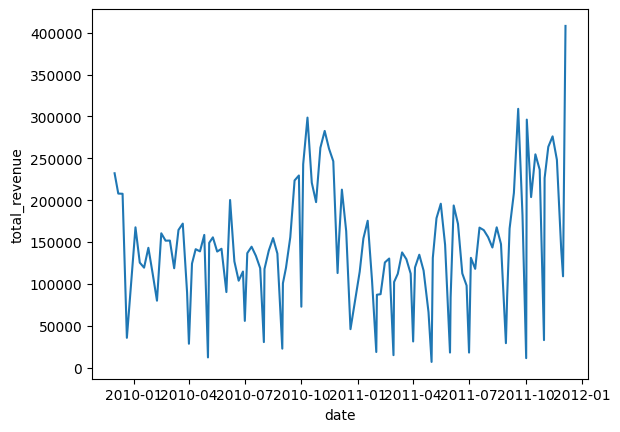

In [107]:
sns.lineplot(x='date',y='total_revenue',data = time_series)

In [108]:
time_series.to_csv('time_series.csv')

In [112]:
time_series['trend'] = range(time_series.shape[0])
time_series['month'] = time_series['month'].astype('category')
# 0 - 121 columns

In [116]:
X = time_series.drop(['week','year','date','total_revenue'],axis=1)
names = pd.get_dummies(X).columns
# forming the pivot table as in Excel
X = pd.get_dummies(X).values
Y = time_series.total_revenue.values

In [114]:
model = LinearRegression()

In [115]:
model.fit(X,Y)

LinearRegression()

In [117]:
dict1 = list(zip(names,model.coef_)) 

In [118]:
dict1

[('trend', -7.505876175645595),
 ('month_1', -18516.227879106256),
 ('month_2', -37733.15733208397),
 ('month_3', -14243.389744274693),
 ('month_4', -37276.25016339643),
 ('month_5', -27325.606453991255),
 ('month_6', -13591.353763552228),
 ('month_7', -24325.63528267397),
 ('month_8', -29878.992237689432),
 ('month_9', 34853.68461717031),
 ('month_10', 45011.90359930279),
 ('month_11', 89228.6442170146),
 ('month_12', 33796.38042328062)]

In [119]:
prediction = model.predict(X)

In [120]:
prediction

array([177476.05181928, 177468.54594311, 177461.04006693, 177453.53419076,
       125133.42001219, 125125.91413602, 125118.40825984, 125110.90238367,
       105886.46705451, 105878.96117834, 105871.45530216, 105863.94942599,
       129346.21113762, 129338.70526144, 129331.19938527, 129323.69350909,
       129316.18763292, 106275.82133762, 106268.31546145, 106260.80958527,
       106253.30370909, 106245.79783292, 116188.93566615, 116181.42978997,
       116173.9239138 , 116166.41803762, 116158.91216145, 129885.65897571,
       129878.15309953, 129870.64722336, 129863.14134718, 129855.63547101,
       119113.84807571, 119106.34219953, 119098.83632336, 119091.33044718,
       119083.82457101, 113522.96173981, 113515.45586364, 113507.94998746,
       113500.44411129, 113492.93823511, 113485.43235894, 178210.60333762,
       178203.09746144, 178195.59158527, 178188.08570909, 178180.57983292,
       188331.29293887, 188323.7870627 , 188316.28118652, 188308.77531035,
       188301.26943417, 2

In [121]:
time_series['prediction'] = prediction

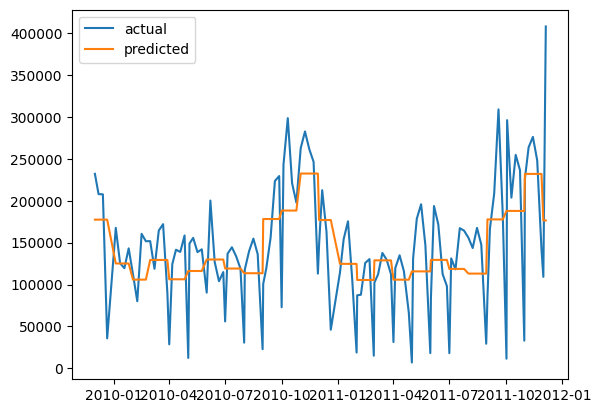

In [124]:
plt.plot(time_series['date'],time_series['total_revenue'],label = 'actual')
plt.plot(time_series['date'],time_series['prediction'],label = 'predicted')
plt.legend()
plt.show()

In [126]:
# FORECASTING
max_date = time_series.date.max()
max_date

Timestamp('2011-12-05 00:00:00')

In [128]:
dates = pd.DataFrame({'date':pd.date_range('2011-12-12','2012-02-05',freq='W')})
dates

,date
0,2011-12-18
1,2011-12-25
2,2012-01-01
3,2012-01-08
4,2012-01-15
5,2012-01-22
6,2012-01-29
7,2012-02-05


In [129]:
time_series = pd.concat([time_series,dates],axis=0)
time_series

,week,month,year,date,total_revenue,trend,prediction
113,49,12,2009.0,2009-12-01,232177.51,0.0,177476.051819
116,50,12,2009.0,2009-12-07,207908.73,1.0,177468.545943
118,51,12,2009.0,2009-12-14,207685.87,2.0,177461.040067
120,52,12,2009.0,2009-12-21,35731.90,3.0,177453.534191
0,1,1,2010.0,2010-01-04,167636.95,4.0,125133.420012
...,...,...,...,...,...,...,...
3,<NA>,NaN,NaN,2012-01-08,NaN,NaN,NaN
4,<NA>,NaN,NaN,2012-01-15,NaN,NaN,NaN
5,<NA>,NaN,NaN,2012-01-22,NaN,NaN,NaN
6,<NA>,NaN,NaN,2012-01-29,NaN,NaN,NaN


In [150]:
time_series['trend'] = range(time_series.shape[0])
time_series['month'] = time_series['date'].dt.month
time_series['month'] = time_series['month'].astype('category') 
time_series['week'] = time_series['date'].dt.isocalendar().week
time_series['year'] = time_series['date'].dt.year

In [151]:
X = time_series.drop(['week','year','date','total_revenue'],axis=1)
# CREATING PIVOT TABLE AS IN EXCEL
names = pd.get_dummies(X).columns
X = pd.get_dummies(X).values
Y = time_series.total_revenue.values

In [152]:
time_series

,week,month,year,date,total_revenue,trend,prediction
113,49,12,2009,2009-12-01,232177.51,0,177476.051819
116,50,12,2009,2009-12-07,207908.73,1,177468.545943
118,51,12,2009,2009-12-14,207685.87,2,177461.040067
120,52,12,2009,2009-12-21,35731.90,3,177453.534191
0,1,1,2010,2010-01-04,167636.95,4,125133.420012
...,...,...,...,...,...,...,...
3,1,1,2012,2012-01-08,NaN,124,NaN
4,2,1,2012,2012-01-15,NaN,125,NaN
5,3,1,2012,2012-01-22,NaN,126,NaN
6,4,1,2012,2012-01-29,NaN,127,NaN


In [159]:
X = time_series.drop(['week','year','date','total_revenue'],axis=1)
X

,month,trend,prediction
113,12,0,177476.051819
116,12,1,177468.545943
118,12,2,177461.040067
120,12,3,177453.534191
0,1,4,125133.420012
...,...,...,...
3,1,124,NaN
4,1,125,NaN
5,1,126,NaN
6,1,127,NaN


In [160]:
names = pd.get_dummies(X).columns
X = pd.get_dummies(X).values
Y = time_series.total_revenue.values

In [161]:
X

array([[0, 177476.0518192837, False, ..., False, False, True],
       [1, 177468.54594310804, False, ..., False, False, True],
       [2, 177461.04006693242, False, ..., False, False, True],
       ...,
       [126, nan, True, ..., False, False, False],
       [127, nan, True, ..., False, False, False],
       [128, nan, False, ..., False, False, False]], dtype=object)

In [162]:
prediction = model.predict(X)
time_series['prediction'] = prediction

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

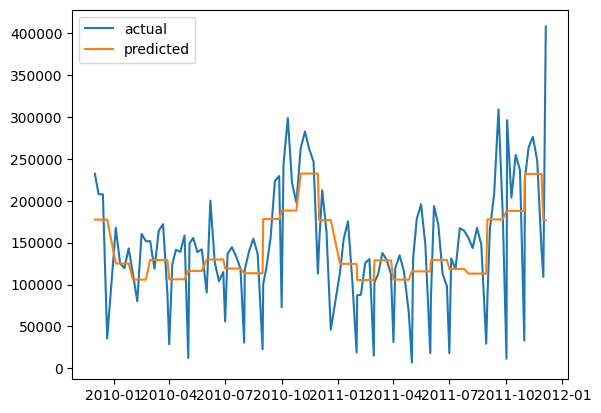

In [163]:
plt.plot(time_series['date'],time_series['total_revenue'],label = 'actual')
plt.plot(time_series['date'],time_series['prediction'],label = 'predicted')
plt.legend()
plt.show()

In [164]:
X

array([[0, 177476.0518192837, False, ..., False, False, True],
       [1, 177468.54594310804, False, ..., False, False, True],
       [2, 177461.04006693242, False, ..., False, False, True],
       ...,
       [126, nan, True, ..., False, False, False],
       [127, nan, True, ..., False, False, False],
       [128, nan, False, ..., False, False, False]], dtype=object)

In [165]:
Y

array([232177.51 , 207908.73 , 207685.87 ,  35731.9  , 167636.95 ,
       125493.61 , 119473.351, 143198.761, 112299.692,  80059.66 ,
       160506.402, 151693.202, 151813.96 , 118785.1  , 164459.771,
       172063.68 ,  89855.96 ,  28646.66 , 124314.76 , 141539.381,
       138922.62 , 158558.581,  12342.17 , 149102.83 , 155673.54 ,
       138681.57 , 142033.27 ,  90358.06 , 200239.71 , 126987.39 ,
       103924.84 , 114861.13 ,  55932.44 , 136775.12 , 144495.58 ,
       133616.   , 118917.03 ,  30637.95 , 117866.37 , 139842.07 ,
       154786.91 , 136279.55 ,  22811.75 , 100807.8  , 119333.94 ,
       155778.921, 223587.04 , 229506.25 ,  72886.41 , 243007.44 ,
       298614.04 , 220882.67 , 197721.45 , 262597.86 , 282707.701,
       261610.061, 246492.99 , 113051.41 , 148627.97 , 212619.13 ,
       163116.12 ,  46059.51 , 114636.8  , 154344.85 , 175452.23 ,
       104861.   ,  18806.43 ,  87149.38 ,  87827.94 , 125700.15 ,
       130380.77 ,  15026.68 , 102360.14 , 112193.93 , 137669.